##  ETL y EDA

In [71]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

Importo las librerias que voy a utilizar, y luego creo una funcion en la cual voy a leer la URl que voy a utilizar, en este caso voy a utilizar la API de la pagina de coingecko, acontinuacion creo los parametros que tengo que utilizar para poder consumir la Api de la mejor forma, decidi tomar los primeros 100 datos de criptomonedads de la pagina; esta funcion al final me devuelve un archivo .json  que luego convierto en un DataFrame de pandas que podre visualizar con mayor facilidad.

In [72]:
def datos_principales_crypto():
    url = "https://api.coingecko.com/api/v3/coins/markets"
    parametros = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 100,
        'page': 1
    }
    respuesta = requests.get(url,params=parametros)
    datos = respuesta.json()
    return datos


In [73]:
crypto_data = datos_principales_crypto()

In [74]:
print(len(crypto_data))

100


In [75]:
cryptos =pd.DataFrame(crypto_data)

In [76]:
cryptos.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,1.000000e+02,1.000000e+02,100.000000,9.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,1.000000e+02,9.400000e+01,5.900000e+01,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,7.206002e+02,1.144861e+10,50.500000,1.394010e+10,4.855798e+08,7.272227e+02,7.186669e+02,-5.456956,-3.269475,-1.450060e+08,-3.638895,1.987496e+13,2.595169e+13,2.427491e+13,1776.528919,-72.451052,8.918280e+01,2.076913e+05
std,4.109953e+03,6.095635e+10,29.011492,6.721234e+10,1.845678e+09,4.144915e+03,4.099864e+03,29.488999,5.162779,4.814556e+08,3.229261,1.185097e+14,1.500621e+14,1.391324e+14,9838.820496,27.685079,3.952786e+02,1.754406e+06
min,4.451950e-07,3.796779e+08,1.000000,4.403461e+08,4.932940e+03,4.582480e-07,4.431350e-07,-215.686146,-13.255580,-4.088120e+09,-13.175530,1.622054e+05,1.622054e+05,1.622054e+05,0.000003,-99.999940,5.636600e-11,4.959700e-01
25%,3.223790e-01,5.298293e+08,25.750000,7.208715e+08,1.303199e+07,3.829650e-01,3.210338e-01,-0.399275,-5.994083,-7.722293e+07,-6.017868,1.147706e+08,1.466388e+08,1.500000e+08,1.295000,-93.300985,2.162291e-02,6.831904e+01
50%,1.185000e+00,8.055821e+08,50.500000,1.347337e+09,4.440644e+07,1.245000e+00,1.175000e+00,-0.035846,-3.893915,-4.024606e+07,-3.900680,8.348508e+08,1.025076e+09,1.000000e+09,10.920000,-84.485365,3.642655e-01,3.767501e+02
75%,7.952500e+00,2.950672e+09,75.250000,6.157696e+09,1.216558e+08,8.425000e+00,7.870000e+00,-0.000915,-0.880337,-1.090512e+07,-0.879290,3.560389e+09,1.000000e+10,9.444444e+09,103.107500,-60.003545,9.535502e-01,4.598239e+03
max,2.917100e+04,5.675355e+11,100.000000,6.124811e+11,1.254484e+10,2.942300e+04,2.910100e+04,1.370000,36.793330,4.819723e+08,3.154280,9.514217e+14,9.999862e+14,9.900000e+14,70643.000000,-4.535720,3.139170e+03,1.750106e+07


In [77]:
cryptos.isna().sum()

id                                   0
symbol                               0
name                                 0
image                                0
current_price                        0
market_cap                           0
market_cap_rank                      0
fully_diluted_valuation              6
total_volume                         0
high_24h                             0
low_24h                              0
price_change_24h                     0
price_change_percentage_24h          0
market_cap_change_24h                0
market_cap_change_percentage_24h     0
circulating_supply                   0
total_supply                         6
max_supply                          41
ath                                  0
ath_change_percentage                0
ath_date                             0
atl                                  0
atl_change_percentage                0
atl_date                             0
roi                                 77
last_updated             

In [78]:
cryptos.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

luego de ver como estaban los datos distribuidos en terminos estadisticos, saber que columnas tienen valores Nulos y ver que columnas tiene el archivo, me dispongo a crear un diccionario con clave el nombre de cada una de las columnas de mi dataframe cryptos y valor como quiero llamar en adelante las columnas(tradusco cada nombre de la columna), para poder entender mejor que tipo de datos tengo en el dataframe 

In [79]:
nombres_columnas = {
    'symbol':'simbolo',
    'name':'nombre',
    'current_price': 'precio_actual',
    'market_cap': 'cap_mercado',
    'market_cap_rank': 'ranking_cap_mercado',
    'fully_diluted_valuation': 'valoracion_total_diluida',
    'total_volume': 'volumen_total',
    'high_24h': 'maximo_24h',
    'low_24h': 'minimo_24h',
    'price_change_24h': 'cambio_precio_24h',
    'price_change_percentage_24h': '%_cambio_precio_24h',
    'market_cap_change_24h': 'cambio_cap_mercado_24h',
    'market_cap_change_percentage_24h': '%_cambio_cap_mercado_24h',
    'circulating_supply': 'suministro_sirculacion',
    'total_supply': 'suminitro_total',
    'max_supply':'suministro_maximo',
    'ath': 'ath(maximo_historico)',
    'ath_change_percentage':'cambio_%_desde_ath(maximo_historico)',
    'ath_date':'fecha_ath(maximo_historico)',
    'atl':'atl(minimo_historico)',
    'atl_change_percentage':'cambio_%_desde_atl(minimo_historico)',
    'atl_date': 'fecha_atl(minimo_historico)',
    'roi':' roi(retorno_de_inverion'
}

In [80]:
cryptos.rename(columns=nombres_columnas, inplace=True)

In [81]:
cryptos.isna().sum()

id                                       0
simbolo                                  0
nombre                                   0
image                                    0
precio_actual                            0
cap_mercado                              0
ranking_cap_mercado                      0
valoracion_total_diluida                 6
volumen_total                            0
maximo_24h                               0
minimo_24h                               0
cambio_precio_24h                        0
%_cambio_precio_24h                      0
cambio_cap_mercado_24h                   0
%_cambio_cap_mercado_24h                 0
suministro_sirculacion                   0
suminitro_total                          6
suministro_maximo                       41
ath(maximo_historico)                    0
cambio_%_desde_ath(maximo_historico)     0
fecha_ath(maximo_historico)              0
atl(minimo_historico)                    0
cambio_%_desde_atl(minimo_historico)     0
fecha_atl(m

In [82]:
cryptos.head()

,id,simbolo,nombre,image,precio_actual,cap_mercado,ranking_cap_mercado,valoracion_total_diluida,volumen_total,maximo_24h,...,suminitro_total,suministro_maximo,ath(maximo_historico),cambio_%_desde_ath(maximo_historico),fecha_ath(maximo_historico),atl(minimo_historico),cambio_%_desde_atl(minimo_historico),fecha_atl(minimo_historico),roi(retorno_de_inverion,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29163.000000,567535507741,1,6.124811e+11,1.254484e+10,29408.000000,...,2.100000e+07,2.100000e+07,69045.00,-57.75340,2021-11-10T14:24:11.849Z,67.810000,42916.51518,2013-07-06T00:00:00.000Z,None,2023-08-16T10:55:44.352Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1824.210000,219163839229,2,2.191638e+11,5.548734e+09,1842.750000,...,1.201391e+08,NaN,4878.26,-62.60633,2021-11-10T14:24:19.604Z,0.432979,421204.82665,2015-10-20T00:00:00.000Z,"{'times': 82.62567559999206, 'currency': 'btc'...",2023-08-16T10:55:47.291Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998678,83088202381,3,8.308820e+10,1.212832e+10,1.001000,...,8.318200e+10,NaN,1.32,-24.51556,2018-07-24T00:00:00.000Z,0.572521,74.44444,2015-03-02T00:00:00.000Z,None,2023-08-16T10:55:00.343Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,234.520000,36094506157,4,4.691981e+10,5.155730e+08,239.200000,...,1.538562e+08,2.000000e+08,686.31,-65.81643,2021-05-10T07:24:17.097Z,0.039818,589095.61995,2017-10-19T00:00:00.000Z,None,2023-08-16T10:55:41.829Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.600571,31679405366,5,6.001333e+10,1.473459e+09,0.627297,...,9.998852e+10,1.000000e+11,3.40,-82.34889,2018-01-07T00:00:00.000Z,0.002686,22231.27079,2014-05-22T00:00:00.000Z,None,2023-08-16T10:55:38.822Z


In [83]:
cryptos["fecha_atl(minimo_historico)"] = pd.to_datetime(cryptos["fecha_atl(minimo_historico)"])

In [84]:
cryptos["fecha_ath(maximo_historico)"] = pd.to_datetime(cryptos["fecha_ath(maximo_historico)"]).dt.date

convierto las columnas 'fecha_atl(minimo_historico)' y 'fecha_ath(maximo_historico) al formato correcto de datetime

In [85]:
columnas_eliminar = ['image',' roi(retorno_de_inverion','last_updated']

In [86]:
cryptos = cryptos.drop(columns=columnas_eliminar)

elimino las columnas 'image' , 'roi(retorno_de_inversion)' y 'last_update', ya que no las concidero relevantes y porque la cantidad de nulos es bastante altas en algunas columnas. para continuar con el proceso de EDA de la mejor manera comienzo a realizar diferentes visualizaciones de los datos. 

#### Histograma de precios 

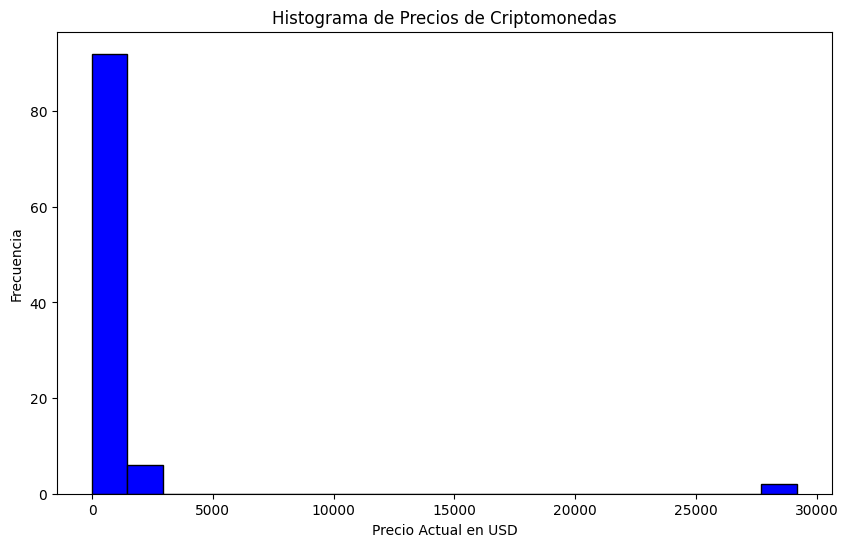

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(cryptos['precio_actual'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Precio Actual en USD')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios de Criptomonedas')
plt.show()


En la metrica anterior se pude ver una distribucion bastante curiosa ya que la mayoria de las criptomonedas se encuentran con un precio entre 0 y 2.500 USD a diferencia del Bitcoin que se acerca a los 30.000 USD

### Top 5 monedas mas Estables

In [40]:
moneda_mas_estable = cryptos.sort_values(by='%_cambio_precio_24h', ascending=True).iloc[:10]
print(f'Las 10 monedas mas estable en las ultimas 24 Horas son: {moneda_mas_estable["nombre"]} con un porcentaje de cambio de: {moneda_mas_estable["%_cambio_precio_24h"]}')


Las 10 monedas mas estable en las ultimas 24 Horas son: 30                Hedera
96    Terra Luna Classic
62               ApeCoin
77                  Pepe
99                   GMX
58            ImmutableX
36                 Aptos
75                  Kava
48              Algorand
76                  Flow
Name: nombre, dtype: object con un porcentaje de cambio de: 30   -16.08554
96   -10.54552
62   -10.44114
77    -9.24480
99    -7.84469
58    -7.77806
36    -7.69383
75    -7.60068
48    -7.37164
76    -7.06642
Name: %_cambio_precio_24h, dtype: float64


In [41]:
moneda_mas_estable

,id,simbolo,nombre,precio_actual,cap_mercado,ranking_cap_mercado,valoracion_total_diluida,volumen_total,maximo_24h,minimo_24h,...,%_cambio_cap_mercado_24h,suministro_sirculacion,suminitro_total,suministro_maximo,ath(maximo_historico),cambio_%_desde_ath(maximo_historico),fecha_ath(maximo_historico),atl(minimo_historico),cambio_%_desde_atl(minimo_historico),fecha_atl(minimo_historico)
30,hedera-hashgraph,hbar,Hedera,0.062555,2069922066,31,3.139953e+09,282618248.0,0.074546,0.062549,...,-16.54505,3.296103e+10,5.000000e+10,5.000000e+10,0.569229,-88.96812,2021-09-15,9.861110e-03,536.81109,2020-01-02 17:30:24.852000+00:00
96,terra-luna,lunc,Terra Luna Classic,0.000070,405818147,97,4.771419e+08,45871144.0,0.000078,0.000068,...,-10.37086,5.816506e+12,6.838775e+12,NaN,119.180000,-99.99994,2022-04-05,9.999670e-07,6878.33637,2022-05-13 02:34:40.340000+00:00
62,apecoin,ape,ApeCoin,1.810000,667028087,63,1.809657e+09,103795579.0,2.040000,1.800000,...,-10.37586,3.685938e+08,1.000000e+09,1.000000e+09,26.700000,-93.21937,2022-04-28,1.770000e+00,2.37557,2023-08-01 03:45:30.342000+00:00
77,pepe,pepe,Pepe,0.000001,526261379,78,5.262614e+08,114816205.0,0.000001,0.000001,...,-9.12524,4.206900e+14,4.206900e+14,4.206900e+14,0.000004,-70.97328,2023-05-05,5.514200e-08,2167.23438,2023-04-18 02:14:41.591000+00:00
99,gmx,gmx,GMX,42.880000,384007776,100,5.683981e+08,21297434.0,46.980000,42.830000,...,-7.64146,8.951654e+06,8.951654e+06,1.325000e+07,91.070000,-52.84746,2023-04-18,1.153000e+01,272.31686,2022-06-15 09:30:22.146000+00:00
58,immutable-x,imx,ImmutableX,0.638138,718381495,59,1.278952e+09,26457700.0,0.714508,0.639057,...,-7.63785,1.123391e+09,2.000000e+09,2.000000e+09,9.520000,-93.26905,2021-11-26,3.780550e-01,69.49456,2022-12-31 07:36:37.649000+00:00
36,aptos,apt,Aptos,6.400000,1446494631,37,6.734723e+09,94260999.0,6.970000,6.390000,...,-7.40865,2.255442e+08,1.050109e+09,NaN,19.920000,-67.84430,2023-01-26,3.080000e+00,107.98599,2022-12-29 21:35:14.796000+00:00
75,kava,kava,Kava,0.757733,528337092,76,5.283105e+08,12275382.0,0.825943,0.757462,...,-7.48785,6.974010e+08,6.973658e+08,NaN,9.120000,-91.68780,2021-08-30,2.871370e-01,164.01772,2020-03-13 02:24:16.835000+00:00
48,algorand,algo,Algorand,0.105483,827902462,49,1.057927e+09,58228691.0,0.114006,0.105591,...,-6.95930,7.825706e+09,7.825706e+09,1.000000e+10,3.560000,-97.02880,2019-06-20,9.839900e-02,7.53093,2023-06-10 04:31:46.997000+00:00
76,flow,flow,Flow,0.507939,527767244,77,7.388624e+08,12386503.0,0.548079,0.508291,...,-6.82281,1.036200e+09,1.450657e+09,1.450657e+09,42.400000,-98.80137,2021-04-05,4.413270e-01,15.14950,2023-06-15 11:15:32.710000+00:00


En esta parte decidí sacar un top 10 de las 10 monedas mas estables en las ultimas 24 horas guiandome un poco con el numero de index de cada una de estas y comparando el numero del ranking de capitalizacion de mercado, llegando a la conclusión de que realmente el porcentaje de cambio de precio en las ultimas 24 horas cobra relevancia con las monedas que estan en el top 20 del ranking de capitalización de mercado. porque la estabilidad en el mercado teniendo un ranking muy alto  no necesariamente me da una buena metrica para seguir analizando.

### Nube de palabras basada en Capitalización de Mercado:

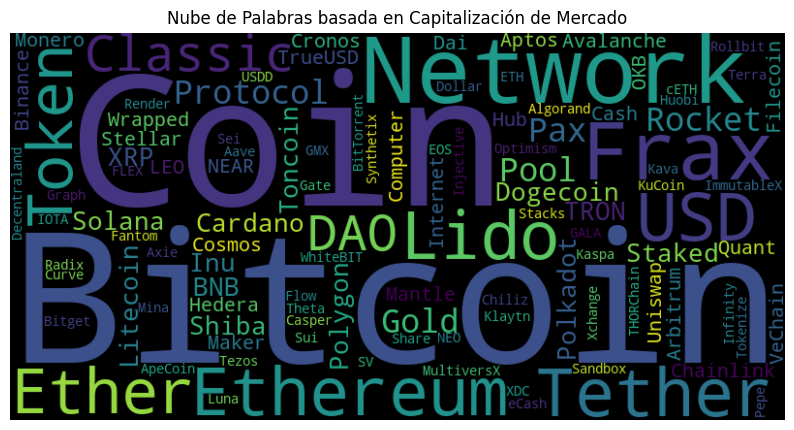

In [42]:
wordcloud_text = ' '.join(cryptos['nombre'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(wordcloud_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras basada en Capitalización de Mercado')
plt.show()


la nube de palabras me brinda un panorama un poco mas visual y general de como se distribuyen las diferentes monedas en el mercado  

###  Matriz de correlación:

C:\Users\mateo\AppData\Local\Temp\ipykernel_15688\1644666826.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cryptos.corr()


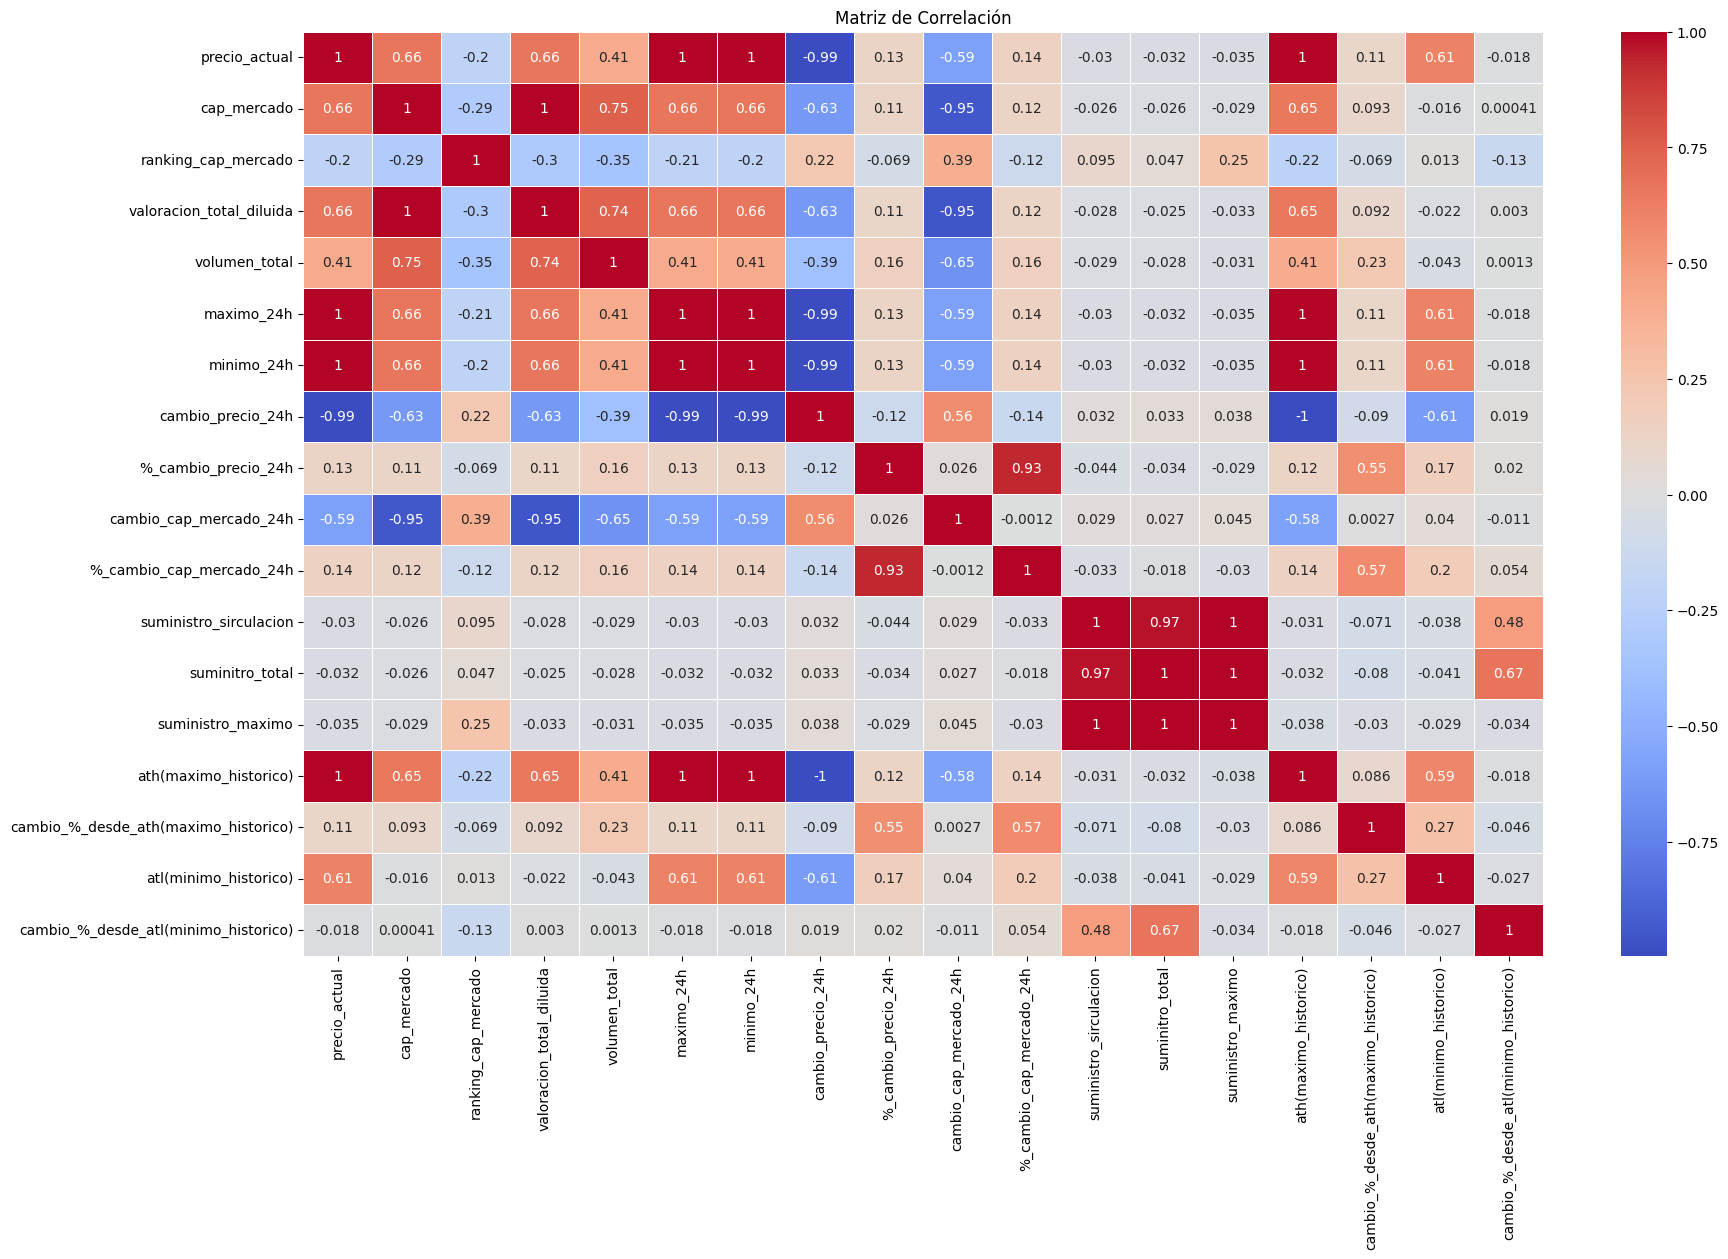

In [43]:
correlation_matrix = cryptos.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


con esta matriz de correlacion puedo evindeciar que columnas podrian llegar a ser mas relevantes al momento de crear mis visualizaciones.

### Cambio porcentual de las ultimas 24Hr y las primeras 100 monedas

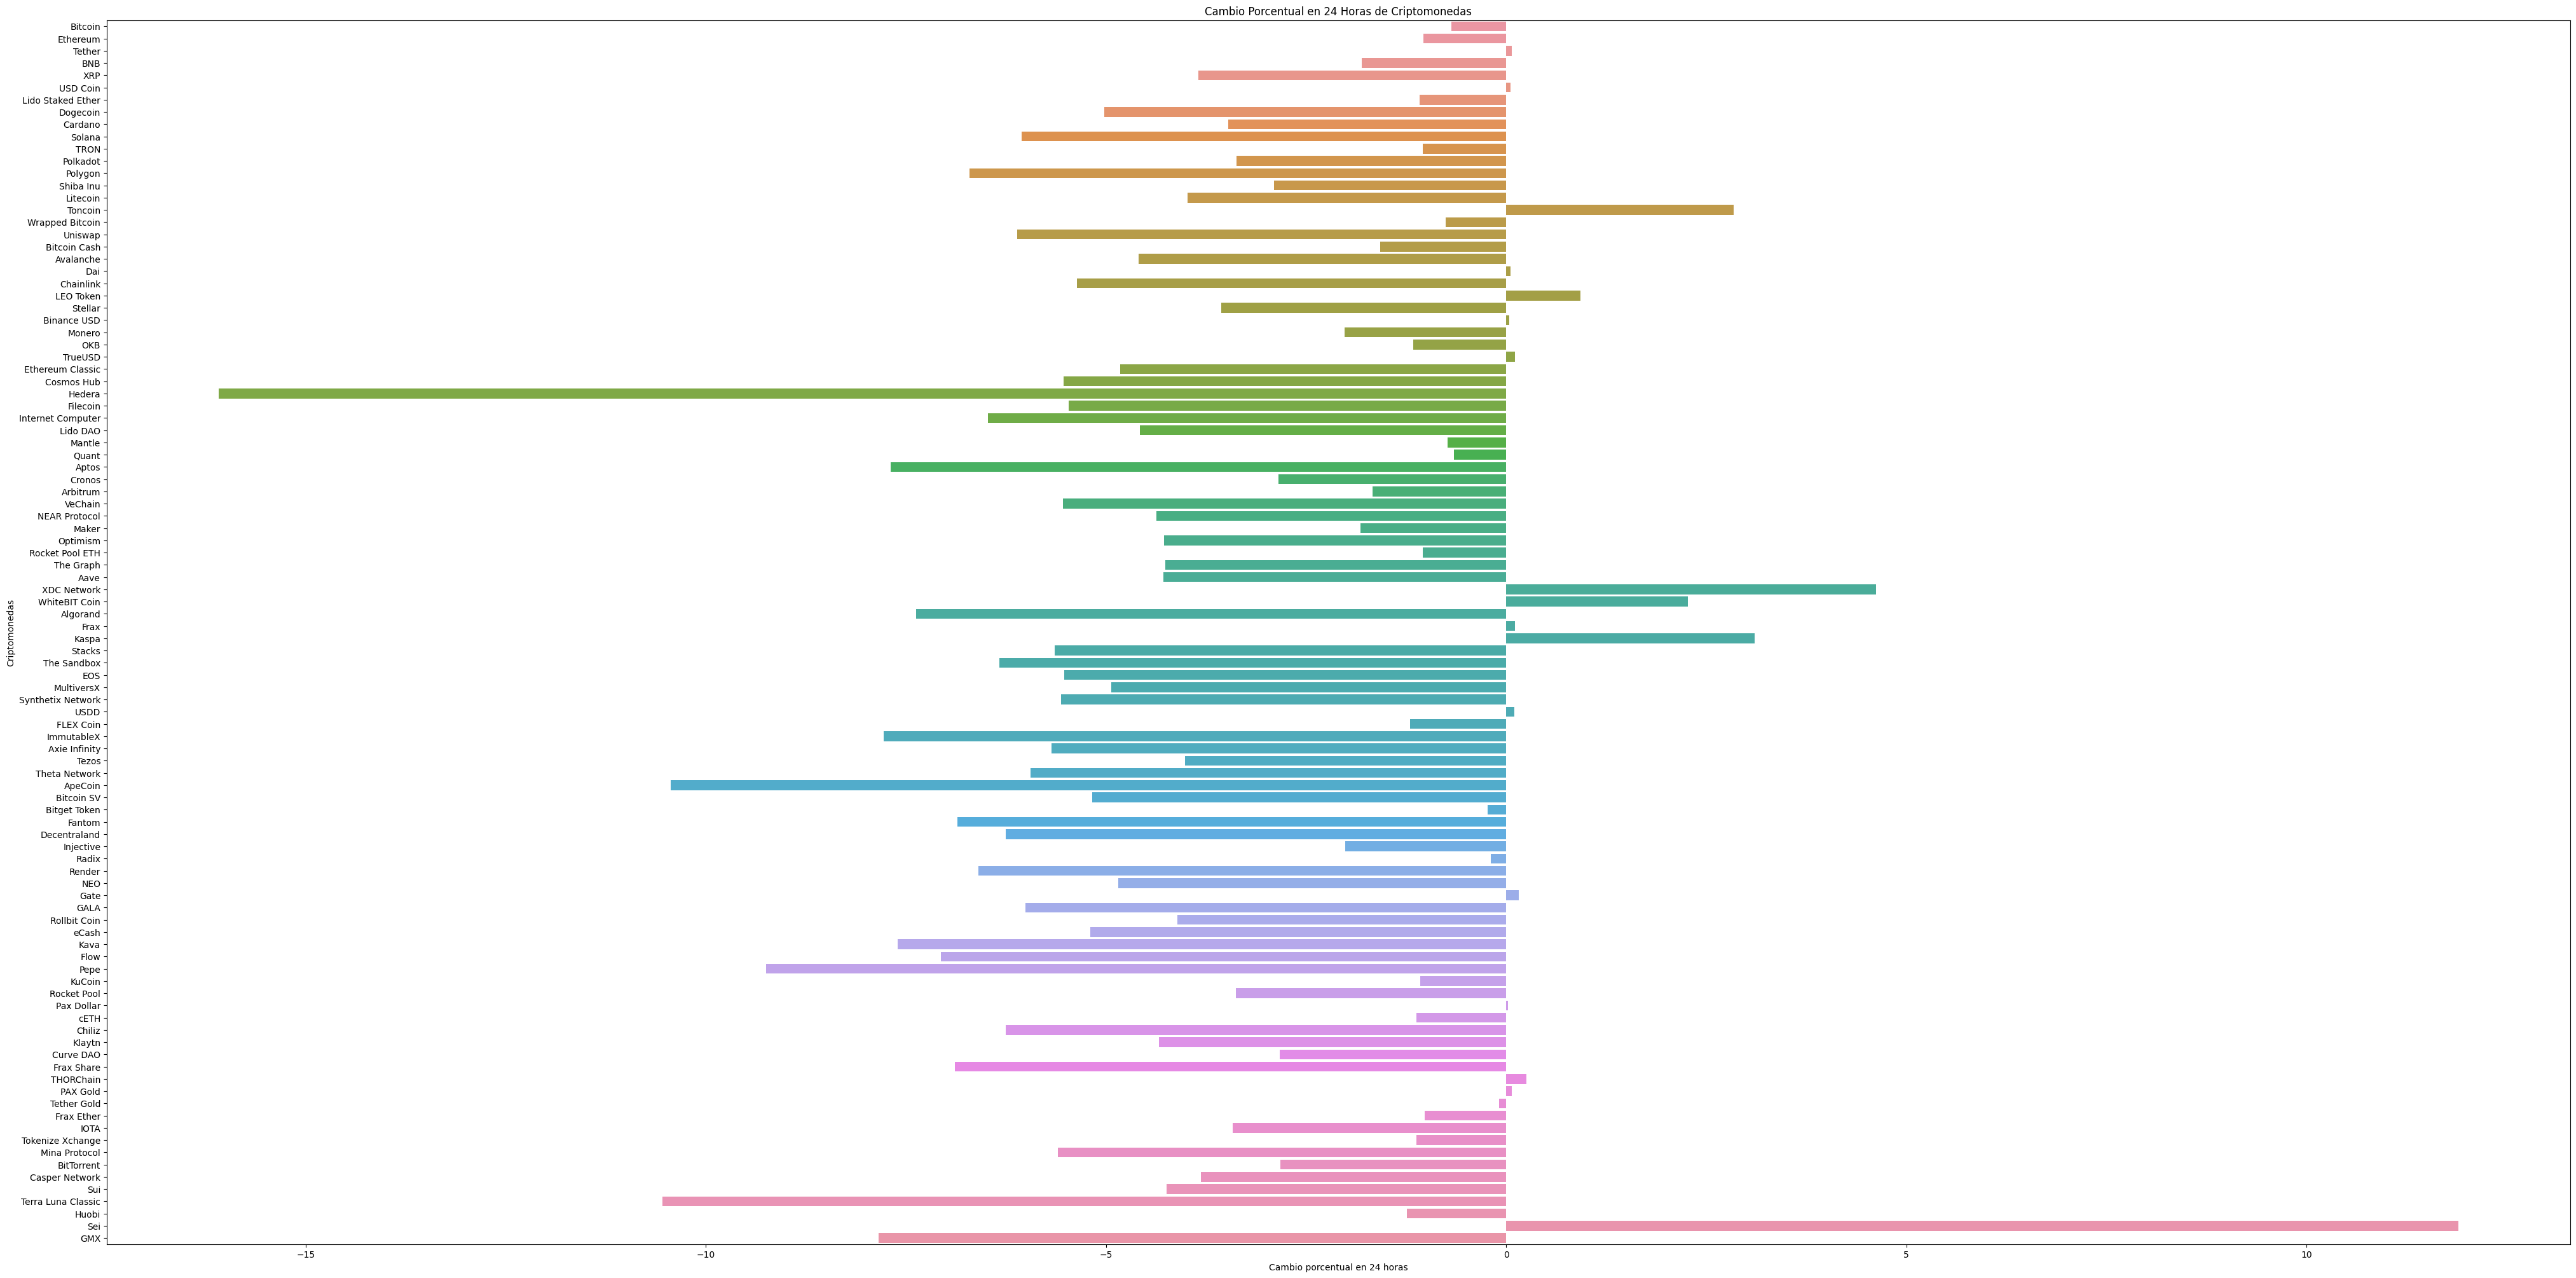

In [44]:
plt.figure(figsize=(50,25))
sns.barplot(x='%_cambio_precio_24h', y='nombre', data=cryptos)
plt.xlabel('Cambio porcentual en 24 horas')
plt.ylabel('Criptomonedas')
plt.title('Cambio Porcentual en 24 Horas de Criptomonedas')
plt.show()

#### cambio porcentual de las ultimas 24hr de las primeras 20 monedas

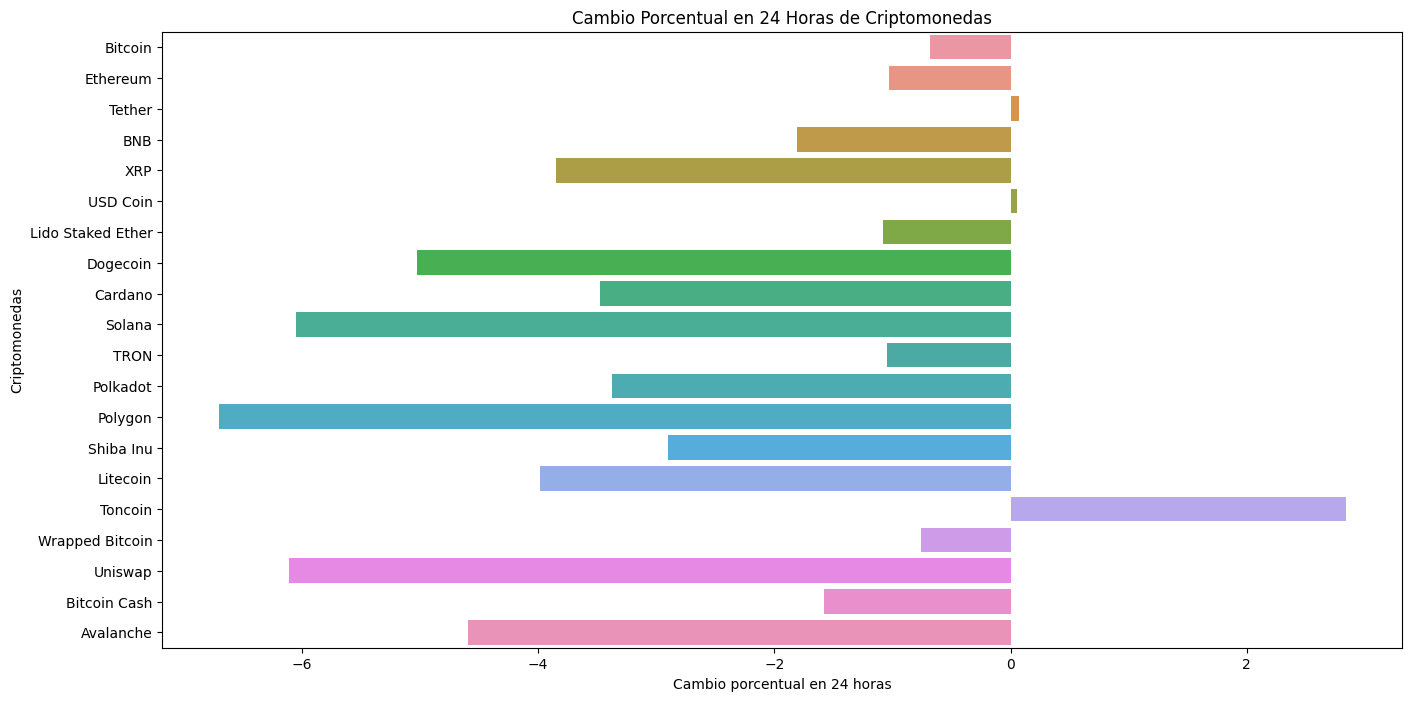

In [45]:
plt.figure(figsize=(16,8))
sns.barplot(x='%_cambio_precio_24h', y='nombre', data=cryptos.head(20))
plt.xlabel('Cambio porcentual en 24 horas')
plt.ylabel('Criptomonedas')
plt.title('Cambio Porcentual en 24 Horas de Criptomonedas')
plt.show()

### Dispercion de cap_mercado Vs volumen de 24Hr

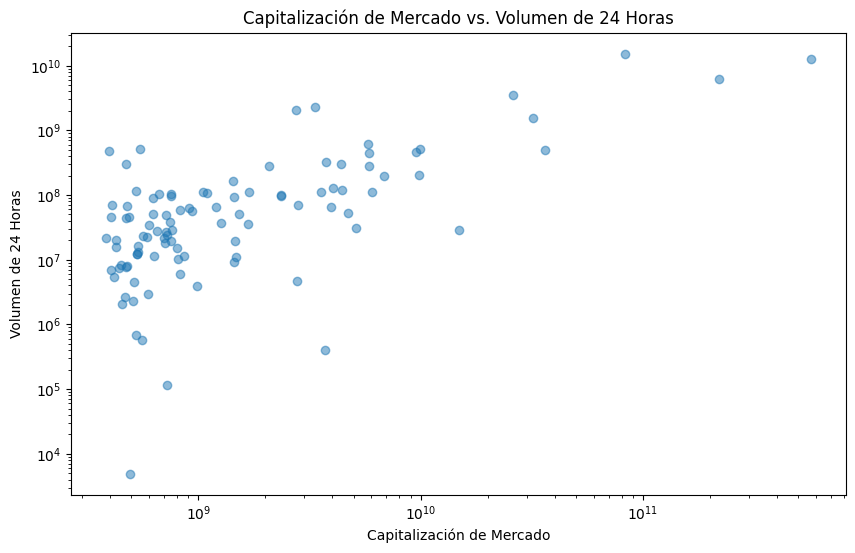

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(cryptos['cap_mercado'], cryptos['volumen_total'], alpha=0.5)
plt.xlabel('Capitalización de Mercado')
plt.ylabel('Volumen de 24 Horas')
plt.title('Capitalización de Mercado vs. Volumen de 24 Horas')
plt.xscale('log')
plt.yscale('log')
plt.show()


luego de hacer algunas visualizaciones y ver como se comporta el mercado en las ultimas 24 horas me doy cuanta que muchas monedas tienen una tendencia de porcentaje de cambio negativo, calramente con algunas ecepciones que drasticamente cambian de manera positiva.

In [47]:
cryptos = cryptos.head(20)

In [48]:
cryptos["precio_actual"] = cryptos["precio_actual"].astype(str).str.replace('.', ',')

C:\Users\mateo\AppData\Local\Temp\ipykernel_15688\2132949763.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cryptos["precio_actual"] = cryptos["precio_actual"].astype(str).str.replace('.', ',')


In [49]:
cryptos["valoracion_total_diluida"] = cryptos["valoracion_total_diluida"].astype(str).str.replace('.', ',')
cryptos["volumen_total"] = cryptos["volumen_total"].astype(str).str.replace('.', ',')
cryptos["maximo_24h"] = cryptos["maximo_24h"].astype(str).str.replace('.', ',')
cryptos["minimo_24h"] = cryptos["minimo_24h"].astype(str).str.replace('.', ',')
cryptos["cambio_precio_24h"] = cryptos["cambio_precio_24h"].astype(str).str.replace('.', ',')
cryptos["%_cambio_precio_24h"] = cryptos["%_cambio_precio_24h"].astype(str).str.replace('.', ',')
cryptos["cambio_cap_mercado_24h"] = cryptos["cambio_cap_mercado_24h"].astype(str).str.replace('.', ',')
cryptos["%_cambio_cap_mercado_24h"] = cryptos["%_cambio_cap_mercado_24h"].astype(str).str.replace('.', ',')
cryptos["suministro_sirculacion"] = cryptos["suministro_sirculacion"].astype(str).str.replace('.', ',')
cryptos["suminitro_total"] = cryptos["suminitro_total"].astype(str).str.replace('.', ',')
cryptos["suministro_maximo"] = cryptos["suministro_maximo"].astype(str).str.replace('.', ',')
cryptos["ath(maximo_historico)"] = cryptos["ath(maximo_historico)"].astype(str).str.replace('.', ',')
cryptos["cambio_%_desde_ath(maximo_historico)"] = cryptos["cambio_%_desde_ath(maximo_historico)"].astype(str).str.replace('.', ',')
cryptos["atl(minimo_historico)"] = cryptos["atl(minimo_historico)"].astype(str).str.replace('.', ',')
cryptos["cambio_%_desde_atl(minimo_historico)"] = cryptos["cambio_%_desde_atl(minimo_historico)"].astype(str).str.replace('.', ',')

C:\Users\mateo\AppData\Local\Temp\ipykernel_15688\109815937.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cryptos["valoracion_total_diluida"] = cryptos["valoracion_total_diluida"].astype(str).str.replace('.', ',')
C:\Users\mateo\AppData\Local\Temp\ipykernel_15688\109815937.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cryptos["volumen_total"] = cryptos["volumen_total"].astype(str).str.replace('.', ',')
C:\Users\mateo\AppData\Local\Temp\ipykernel_15688\109815937.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True

por ultimo cambio los decimales '.' por ',' en las diferentes columnas que me podrian generar algun tipo de discrepancia con la calidad de los datos.

Para terminos de eficiencia en el DataFrame y luego de ver como se comportaban las primeras 100 monedas en el ranking, tome la decicion de unicamente trabajar con las primeras 20 criptomonedas, las cuales me proporcionan un tipo de seguridad por el tiempo que llevan en el mercado y analizando que su comportamiento en las ultimas horas no es muy volatil decido crear un csv especificando que tipo de separador voy a utilizar para poder continual que el analisis en la plataforma de power BI

In [51]:
cryptos.head()

,id,simbolo,nombre,precio_actual,cap_mercado,ranking_cap_mercado,valoracion_total_diluida,volumen_total,maximo_24h,minimo_24h,...,%_cambio_cap_mercado_24h,suministro_sirculacion,suminitro_total,suministro_maximo,ath(maximo_historico),cambio_%_desde_ath(maximo_historico),fecha_ath(maximo_historico),atl(minimo_historico),cambio_%_desde_atl(minimo_historico),fecha_atl(minimo_historico)
0,bitcoin,btc,Bitcoin,"29130,0",566439778011,1,"611303266521,0","12846029652,0","29409,0","29101,0",...,"-0,77154","19458812,0","21000000,0","21000000,0","69045,0","-57,83941",2021-11-10,"67,81","42828,93179",2013-07-06 00:00:00+00:00
1,ethereum,eth,Ethereum,"1821,54",218787350092,2,"218787350092,0","6106641908,0","1842,87","1818,53",...,"-1,07073","120139112,969494","120139112,969494",nan,"4878,26","-62,66565",2021-11-10,"0,432979","420536,44405",2015-10-20 00:00:00+00:00
2,tether,usdt,Tether,"0,999016",83041449023,3,"83041449023,0","15308405739,0","1,001","0,996782",...,"-0,29924","83182001730,3693","83182001730,3693",nan,"1,32","-24,54736",2018-07-24,"0,572521","74,37095",2015-03-02 00:00:00+00:00
3,binancecoin,bnb,BNB,"234,77",36090086373,4,"46914064043,0","494027380,0","239,58","234,57",...,"-1,87592","153856150,0","153856150,0","200000000,0","686,31","-65,82135",2021-05-10,"0,0398177","589010,71403",2017-10-19 00:00:00+00:00
4,ripple,xrp,XRP,"0,603755",31949060701,5,"60524160377,0","1543883471,0","0,627922","0,596803",...,"-3,74645","52787284454,0","99988519823,0","100000000000,0","3,4","-82,19064",2018-01-07,"0,00268621","22431,48106",2014-05-22 00:00:00+00:00


In [52]:
cryptos.to_csv('Data/cryptos.csv',sep=';', index=False)